In [1]:
import os
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
from sklearn import preprocessing
from scipy import stats
from scipy.stats import zscore
from math import radians, cos, sin, asin, sqrt
import pydot
import seaborn as sns
import keras
import tensorflow as tf
from tensorflow.keras import backend as K
from tensorflow.keras import datasets, layers, models
import os, shutil
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
!pip install category_encoders
import category_encoders as ce
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report

     |████████████████████████████████| 86 kB 2.9 MB/s 


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
# load in data 
url = 'https://raw.githubusercontent.com/rindalafayyad17/263-Project/main/diabetes_012_health_indicators_BRFSS2015.csv'
diabetes = pd.read_csv(url)

In [3]:
diabetes.shape

(253680, 22)

In [4]:
# check the counts for 0 no diabetes, 1 prediabetic, 2 diabetic
diabetes['Diabetes_012'].value_counts()

0.0    213703
2.0     35346
1.0      4631
Name: Diabetes_012, dtype: int64

In [6]:
# reclassify the prediabetic as diabetic instead 
diabetes[diabetes['Diabetes_012'] == 0.0] = 1.0


In [7]:
# check the counts for 0 no diabetes, 1 prediabetic, 2 diabetic
diabetes['Diabetes_012'].value_counts()

1.0    218334
2.0     35346
Name: Diabetes_012, dtype: int64

In [8]:
#using category encoders instead
ce_OHE = ce.OneHotEncoder(cols=['Age','Education', 'Income'])

diabetes_final = ce_OHE.fit_transform(diabetes)
print(diabetes_final.head())
diabetes_final.shape

   Diabetes_012  HighBP  HighChol  CholCheck  BMI  Smoker  Stroke  \
0           1.0     1.0       1.0        1.0  1.0     1.0     1.0   
1           1.0     1.0       1.0        1.0  1.0     1.0     1.0   
2           1.0     1.0       1.0        1.0  1.0     1.0     1.0   
3           1.0     1.0       1.0        1.0  1.0     1.0     1.0   
4           1.0     1.0       1.0        1.0  1.0     1.0     1.0   

   HeartDiseaseorAttack  PhysActivity  Fruits  ...  Education_5  Education_6  \
0                   1.0           1.0     1.0  ...            0            0   
1                   1.0           1.0     1.0  ...            0            0   
2                   1.0           1.0     1.0  ...            0            0   
3                   1.0           1.0     1.0  ...            0            0   
4                   1.0           1.0     1.0  ...            0            0   

   Income_1  Income_2  Income_3  Income_4  Income_5  Income_6  Income_7  \
0         1         0        

(253680, 46)

In [11]:
# need to make training, validation and test split
features = diabetes_final.drop('Diabetes_012', axis = 1)

# reshape labels and encode them
ce_OHE = ce.OneHotEncoder(cols=['Diabetes_012'])
labels = ce_OHE.fit_transform(diabetes_final)
labels = labels.iloc[:,0:2]

In [15]:
# split into training and testing set 
X_train, X_test, y_train, y_test = train_test_split(features, labels,
    test_size=0.2, shuffle = True, random_state = 356)

# Use the same function above to spliut the training into train and validation set
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, 
    test_size=0.25, random_state= 356) # 0.25 x 0.8 = 0.2

In [20]:
features.head()

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,Education_5,Education_6,Income_1,Income_2,Income_3,Income_4,Income_5,Income_6,Income_7,Income_8
0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0,0,1,0,0,0,0,0,0,0
1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0,0,1,0,0,0,0,0,0,0
2,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0,0,1,0,0,0,0,0,0,0
3,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0,0,1,0,0,0,0,0,0,0
4,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0,0,1,0,0,0,0,0,0,0


In [24]:
# build and compile model 
# Define model -- should change model name
model = keras.Sequential([
  layers.Dense(256, activation='relu', input_dim = 45),
  layers.Dropout(0.5),

  layers.Dense(128, activation='sigmoid'), 
  layers.Dropout(0.5),

  layers.Dense(32, activation='sigmoid'), 

  layers.Dense(2, activation='sigmoid') # 2 categories
])

# model compile function
model.compile(loss = 'binary_crossentropy',
              optimizer = tf.keras.optimizers.RMSprop(),
              metrics = ['accuracy'])

In [26]:
history = model.fit(X_train, 
          y_train, 
          epochs = 50, #change epochs to 100 after testing
          batch_size = 200,
          validation_data=(X_val, y_val)
          )

Epoch 1/50
762/762 [==============================] - 9s 11ms/step - loss: 0.0562 - accuracy: 0.9819 - val_loss: 0.0575 - val_accuracy: 0.9813
Epoch 2/50
762/762 [==============================] - 5s 7ms/step - loss: 0.0562 - accuracy: 0.9819 - val_loss: 0.0574 - val_accuracy: 0.9813
Epoch 3/50
762/762 [==============================] - 6s 8ms/step - loss: 0.0561 - accuracy: 0.9819 - val_loss: 0.0576 - val_accuracy: 0.9813
Epoch 4/50
762/762 [==============================] - 9s 12ms/step - loss: 0.0562 - accuracy: 0.9819 - val_loss: 0.0575 - val_accuracy: 0.9813
Epoch 5/50
762/762 [==============================] - 9s 12ms/step - loss: 0.0562 - accuracy: 0.9819 - val_loss: 0.0575 - val_accuracy: 0.9813
Epoch 6/50
762/762 [==============================] - 9s 12ms/step - loss: 0.0561 - accuracy: 0.9819 - val_loss: 0.0574 - val_accuracy: 0.9813
Epoch 7/50
762/762 [==============================] - 8s 10ms/step - loss: 0.0561 - accuracy: 0.9819 - val_loss: 0.0576 - val_accuracy: 0.9813
E

In [27]:
# save model
model.save('Drive/diabetes2.h5')

In [28]:
# load model 
new_model = tf.keras.models.load_model("Drive/diabetes2.h5")

# Show the model architecture
new_model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 256)               11776     
                                                                 
 dropout_8 (Dropout)         (None, 256)               0         
                                                                 
 dense_17 (Dense)            (None, 128)               32896     
                                                                 
 dropout_9 (Dropout)         (None, 128)               0         
                                                                 
 dense_18 (Dense)            (None, 32)                4128      
                                                                 
 dense_19 (Dense)            (None, 2)                 66        
                                                                 
Total params: 48,866
Trainable params: 48,866
Non-trai

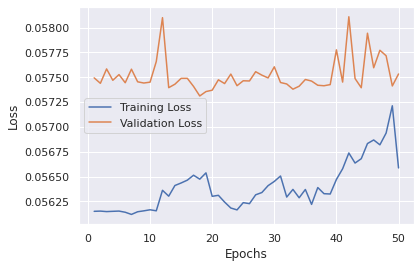

In [29]:
# plot of validation loss and train loss
import seaborn as sns
sns.set()

train_acc  = history.history['accuracy']
train_loss = history.history['loss']
val_acc  = history.history['val_accuracy']
val_loss = history.history['val_loss']

epochs = range(1, len(train_acc) + 1)

plt.plot(epochs, train_loss, label = 'Training Loss')
plt.plot(epochs, val_loss, label = 'Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

In [30]:
# test set accuracy 
test_loss, test_acc = new_model.evaluate(X_test, y_test)
print("The test set accuracy is: ", test_acc)

1586/1586 [==============================] - 3s 2ms/step - loss: 0.0569 - accuracy: 0.9816
The test set accuracy is:  0.9816303849220276


In [34]:
# check in here 

y_proba = new_model.predict(X_test)
# make values predicted binary and not vector of probs
y_pred = y_proba.argmax(axis = 1) # want 0,1 vector
y_pred

array([0, 0, 0, ..., 0, 1, 0])

In [39]:
# need to y_test to be single vector of 0,1 again
y_test_lab = diabetes.iloc[y_test.index, :]["Diabetes_012"] # must check if this actually works as desired
y_test_lab[y_test_lab == 1] = 0
y_test_lab[y_test_lab == 2] = 1

print(y_test_lab)
y_pred

193256    0.0
52416     0.0
125094    0.0
74892     0.0
1357      0.0
         ... 
87225     0.0
70127     0.0
78535     0.0
210913    1.0
72847     0.0
Name: Diabetes_012, Length: 50736, dtype: float64


/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:8870: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)
/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:1056: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cacher_needs_updating = self._check_is_chained_assignment_possible()


array([0, 0, 0, ..., 0, 1, 0])

In [42]:
# create accuracy table 
#importing confusion matrix
confusion = confusion_matrix(y_test_lab, y_pred)
print('Confusion Matrix\n')
print(confusion)

#importing accuracy_score, precision_score, recall_score, f1_score
print('\nAccuracy: {:.2f}\n'.format(accuracy_score(y_test_lab, y_pred)))



Confusion Matrix

[[42707   932]
 [    0  7097]]

Accuracy: 0.98



## **To Do: Add confusion matrix based on income and education split. Decide what split we want for income/education. **



